In [1]:
import sys
import os
sys.path.append("code")
current_dir = os.path.dirname(os.path.realpath('__file__'))
data_source = os.path.join(current_dir, 'data', 'weatherAUS.csv')

from cleaning.clean import Clean
from regresion_lineal.regresion import RegressionLineal
from shap_analyzer.shap_analyzer import SHAPAnalyzer
from modelo_base.regression import RegresionModelBase
from modelo_base.clasification import ClasificationModelBase
from neural_network.classification_neural import ClassificationNeuralNetwork
from neural_network.regression_neural import RegressionNeuralNetwork

data = Clean(data_source)
#nos devuelve el dataset limpio
data_clean = data.process()

2023-12-09 13:27:26.631596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


No hay columnas con valores nulos en data_clean.


In [3]:
print(data_clean)
# con estos datos, podes hacer los graficos como vos sabes asi no te la complico

             Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
30167  2008-02-01     Sydney     19.5     22.4      15.6          6.2   
30168  2008-02-02     Sydney     19.5     25.6       6.0          3.4   
30169  2008-02-03     Sydney     21.6     24.5       6.6          2.4   
30170  2008-02-04     Sydney     20.2     22.8      18.8          2.2   
30171  2008-02-05     Sydney     19.7     25.7      77.4          2.2   
...           ...        ...      ...      ...       ...          ...   
70366  2017-06-20  Melbourne      6.4     15.8       0.0          2.4   
70367  2017-06-21  Melbourne      7.8     13.5       0.6          0.6   
70368  2017-06-22  Melbourne      6.7     14.1       0.2          0.6   
70369  2017-06-23  Melbourne      7.4     14.9       0.0          1.6   
70370  2017-06-24  Melbourne      8.3     12.3       1.4          1.8   

       Sunshine WindGustDir WindDir9am WindDir3pm  ...  Pressure9am  \
30167       0.0   sin datos          S        SSW  .

In [3]:
#agregar graficos que consideres que son necesarios

In [4]:
regresion_clasic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regresion_clasic.classic()
metricas = regresion_clasic.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal clasic:")
print(metricas)

Métricas del modelo Regresion lineal clasic:
{'MSE': 36.25443016231968, 'R2': 0.15273389121687952, 'RMSE': 6.021165183111959, 'MAE': 2.8929339042433773, 'MAPE': inf}


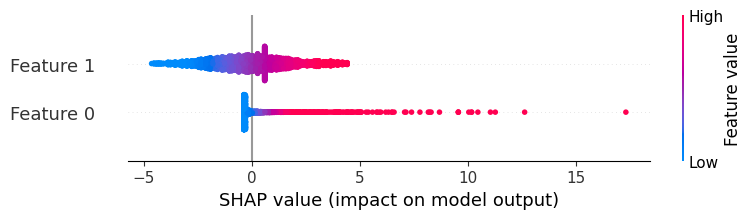

In [5]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [6]:
print('métodos de gradiente descendiente')
regresion_gradient_desecent = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regresion_gradient_desecent.gradient_descent()
metricas = regresion_gradient_desecent.metrics(y_test, y_pred)
print(f"Métricas del Modelo:")
print(metricas)

métodos de gradiente descendiente
Métricas del Modelo:
{'MSE': 37.65408153675684, 'R2': 0.12002403566645803, 'RMSE': 6.136292165205047, 'MAE': 2.5940776311297213, 'MAPE': inf}


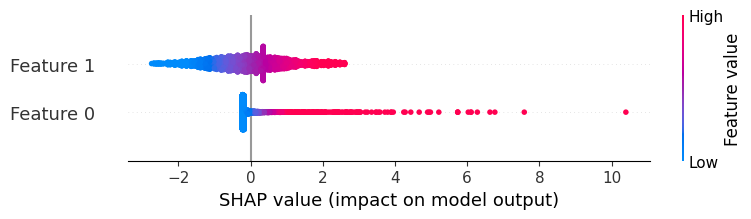

In [7]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [8]:
param_grid = {
    'fit_intercept': [True, False],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 500, 1000]  
}

regresion_gradient_descent = RegressionLineal(data_clean)
x_test, y_test, y_pred, best_model = regresion_gradient_descent.gradient_descent_optimize_hyperparameters(param_grid)
metricas = regresion_gradient_descent.metrics(y_test, y_pred)
print(f"Métricas del mejor modelo:")
print(metricas)
print("Mejores hiperparámetros:", best_model.get_params())

Métricas del mejor modelo:
{'MSE': 36.259259526808634, 'R2': 0.15262102895866347, 'RMSE': 6.0215662021444745, 'MAE': 2.896142585296004, 'MAPE': inf}
Mejores hiperparámetros: {'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 100, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [3]:
# regresion de Lasso
regresion_lasso = RegressionLineal(data_clean)
x_test, y_test, y_pred, lasso_model = regresion_lasso.lasso_regression()
metricas = regresion_lasso.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Lasso:")
print(metricas)

Métricas del modelo Regresion lineal Lasso:
{'MSE': 38.61752011844682, 'R2': 0.09750847399564222, 'RMSE': 6.214299648266635, 'MAE': 2.7975271726065642, 'MAPE': inf}


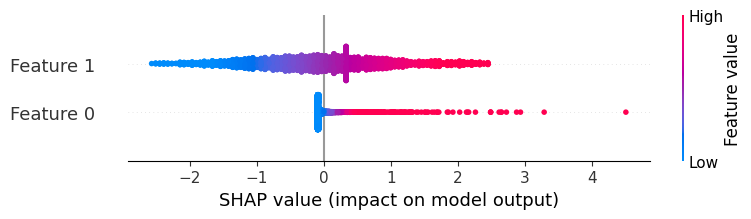

In [4]:
try:
    shap_analyzer = SHAPAnalyzer(lasso_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [5]:
# Crear una instancia de la clase RegressionLineal
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_lasso, best_lasso_model = regresion_lineal.optimize_hyperparameters('Lasso', param_grid_lasso)

# Calcular métricas
metricas_lasso = regresion_lineal.metrics(y_test, y_pred_lasso)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Lasso:")
print(metricas_lasso)
print("Mejores hiperparámetros para Lasso:", best_lasso_model.get_params())


Métricas del mejor modelo Lasso:
{'MSE': 36.255453033039636, 'R2': 0.152709986726013, 'RMSE': 6.021250122112487, 'MAE': 2.8927757984491502, 'MAPE': inf}
Mejores hiperparámetros para Lasso: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


In [8]:
# regresion de Ridge

regresion_ridge = RegressionLineal(data_clean)
x_test, y_test, y_pred, ridge_model = regresion_ridge.ridge_regression()
metricas = regresion_lasso.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Ridge:")
print(metricas)


Métricas del modelo Regresion lineal Ridge:
{'MSE': 36.25448338098172, 'R2': 0.1527326474966364, 'RMSE': 6.021169602409628, 'MAE': 2.8928858353136873, 'MAPE': inf}


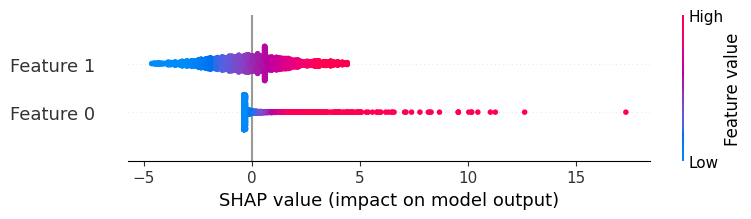

In [9]:
try:
    shap_analyzer = SHAPAnalyzer(ridge_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [10]:
# Crear una instancia de la clase RegressionLineal
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_Ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_lasso, best_lasso_model = regresion_lineal.optimize_hyperparameters('Ridge', param_grid_Ridge)

# Calcular métricas
metricas_lasso = regresion_lineal.metrics(y_test, y_pred_lasso)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Ridge:")
print(metricas_lasso)
print("Mejores hiperparámetros para Ridge:", best_lasso_model.get_params())

Métricas del mejor modelo Ridge:
{'MSE': 36.254574557806954, 'R2': 0.1527305166940397, 'RMSE': 6.021177173759875, 'MAE': 2.892921022081332, 'MAPE': inf}
Mejores hiperparámetros para Ridge: {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


In [14]:
# regresion de Elasticnet

regresion_elasticnet = RegressionLineal(data_clean)
x_test, y_test, y_pred, elasticnet_model = regresion_elasticnet.elasticnet_regression()
metricas = regresion_elasticnet.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Elasticnet:")
print(metricas)

Métricas del modelo Regresion lineal Elasticnet:
{'MSE': 38.02541252492715, 'R2': 0.11134602969562801, 'RMSE': 6.166474886426373, 'MAE': 2.7791559587372605, 'MAPE': inf}


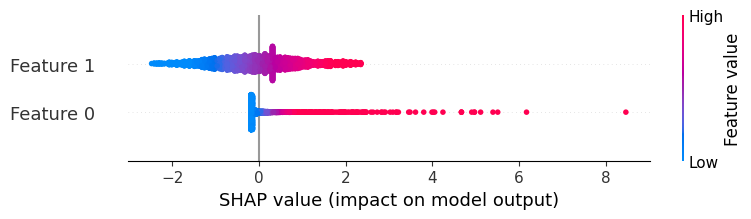

In [15]:
try:
    shap_analyzer = SHAPAnalyzer(elasticnet_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [2]:
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_Elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Puedes ajustar estos valores según sea necesario
}
# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_elasticnet, best_lasso_model = regresion_lineal.optimize_hyperparameters('ElasticNet', param_grid_Elasticnet)

# Calcular métricas
metricas_elasticnet = regresion_lineal.metrics(y_test, y_pred_elasticnet)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Elasticnet:")
print(metricas_elasticnet)
print("Mejores hiperparámetros para Elasticnet:", best_lasso_model.get_params())

Métricas del mejor modelo Elasticnet:
{'MSE': 36.25870520374321, 'R2': 0.1526339834898629, 'RMSE': 6.021520173821824, 'MAE': 2.8923546234829263, 'MAPE': inf}
Mejores hiperparámetros para Elasticnet: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.3, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


Accuracy: 0.98
Precision: 0.99
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.97
Matiz de confusión:
          pred: No  Pred: Si
Real: No      2261         8
Real: si        36       601


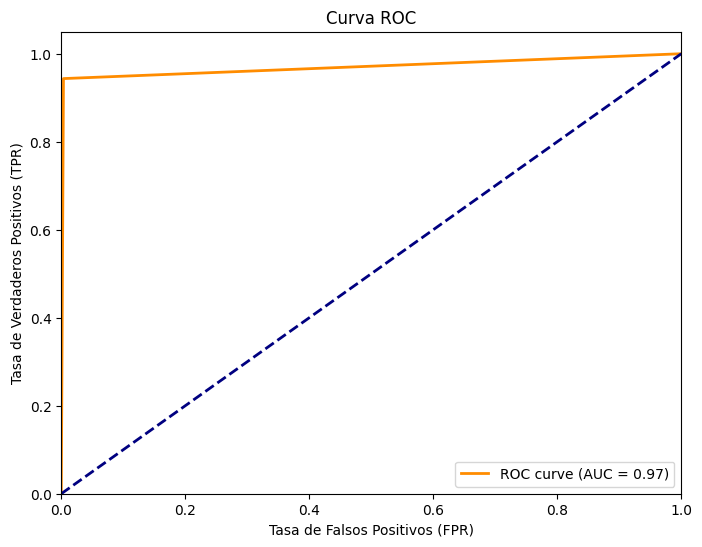

In [3]:
#regresion logistica
regression_logistic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regression_logistic.logistic()
regression_logistic.logic_metrics(y_test, y_pred)

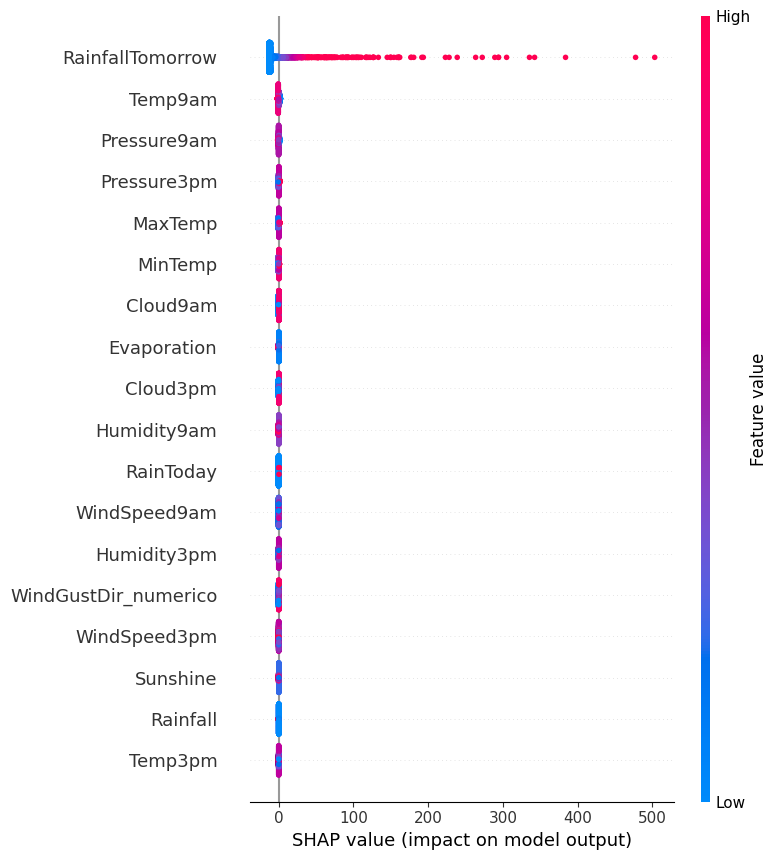

In [4]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [5]:
regresion_lineal = RegressionLineal(data_clean)
#buscando los hipperparametros
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
x_test_logistic, y_test_logistic, y_pred_logistic, best_logistic_model = regresion_lineal.optimize_hyperparameters_logistic(param_grid_logistic)

# Calcular métricas
metricas_logistic = regresion_lineal.metrics(y_test_logistic, y_pred_logistic)

# Imprimir métricas y mejores hiperparámetros para la regresión logística
print(f"Métricas del mejor modelo de regresión logística:")
print(metricas_logistic)
print("Mejores hiperparámetros para la regresión logística:", best_logistic_model.get_params())

Métricas del mejor modelo de regresión logística:
{'MSE': 0.013764624913971095, 'R2': 0.9209901516371909, 'RMSE': 0.11732273826488664, 'MAE': 0.013764624913971095, 'MAPE': inf}
Mejores hiperparámetros para la regresión logística: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [2]:
#modelo base
regresion_model = RegresionModelBase(data_clean)
x_test, y_test, y_pred, modelo = regresion_model.regresion()


# También puedes acceder a los atributos del mejor modelo obtenido
print("Mejores hiperparámetros encontrados mediante Grid Search:")
print(modelo.get_params())

Error Cuadrático Medio en el conjunto de prueba: 35.18542309477494
Error Absoluto Medio en el conjunto de prueba: 2.238068290865597
Raíz del Error Cuadrático Medio en el conjunto de prueba: 5.931730194030654
Coeficiente de Determinación (R^2) en el conjunto de prueba: 0.34052927434335645
Mejores hiperparámetros encontrados mediante Grid Search:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


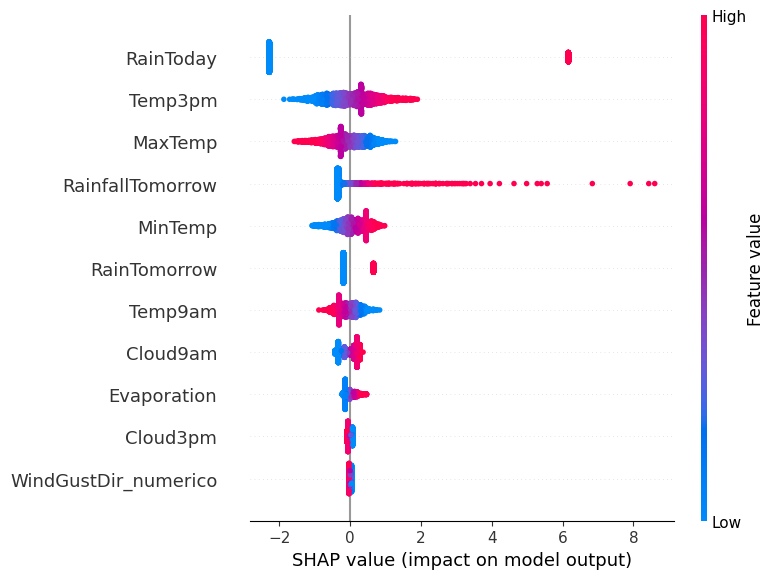

In [3]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [2]:
#clasificador Base
clasification_model = ClasificationModelBase(data_clean)
# Entrenar el modelo y obtener los resultados
x_test, y_test, predictions, best_model = clasification_model.clasificacion()
print("Mejores hiperparámetros encontrados mediante Grid Search:")
print(best_model.get_params())

Precisión en el conjunto de prueba: 1.00
Recall en el conjunto de prueba: 1.00
F1-score en el conjunto de prueba: 1.00
Exactitud en el conjunto de prueba: 1.00
Mejores hiperparámetros encontrados mediante Grid Search:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


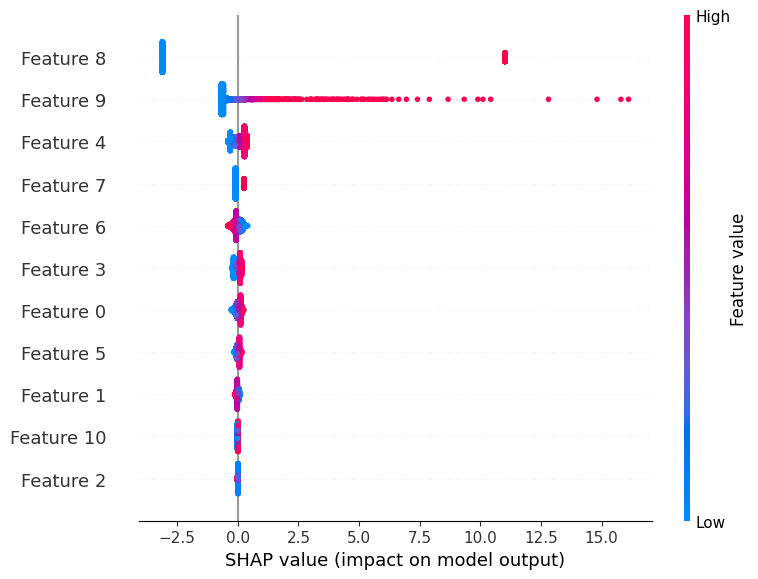

In [3]:
try:
    shap_analyzer = SHAPAnalyzer(best_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [6]:
print('=============================clasificacion con redes neuronales================================================')
classification_nn_model = ClassificationNeuralNetwork(data_clean)
trained_model = classification_nn_model.classification()


[I 2023-12-09 13:09:53,901] A new study created in memory with name: no-name-54713749-91ef-4450-910b-2cc996218819


=============================clasificacion con redes neuronales================================================
91/91 [==============================] - 0s 694us/step


[I 2023-12-09 13:09:57,631] Trial 0 finished with value: 0.00034411562284930586 and parameters: {'num_layers': 1, 'n_units_l0': 51}. Best is trial 0 with value: 0.00034411562284930586.


91/91 [==============================] - 0s 665us/step


[I 2023-12-09 13:10:00,948] Trial 1 finished with value: 0.006538196834136256 and parameters: {'num_layers': 1, 'n_units_l0': 2}. Best is trial 0 with value: 0.00034411562284930586.


91/91 [==============================] - 0s 705us/step


[I 2023-12-09 13:10:04,767] Trial 2 finished with value: 0.002064693737095613 and parameters: {'num_layers': 2, 'n_units_l0': 6, 'n_units_l1': 40}. Best is trial 0 with value: 0.00034411562284930586.


91/91 [==============================] - 0s 738us/step


[I 2023-12-09 13:10:08,473] Trial 3 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 10, 'n_units_l1': 42}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 716us/step


[I 2023-12-09 13:10:12,200] Trial 4 finished with value: 0.0010323468685478066 and parameters: {'num_layers': 2, 'n_units_l0': 20, 'n_units_l1': 5}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 715us/step


[I 2023-12-09 13:10:16,623] Trial 5 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 57, 'n_units_l1': 15, 'n_units_l2': 60}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 755us/step


[I 2023-12-09 13:10:20,908] Trial 6 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 18, 'n_units_l1': 23, 'n_units_l2': 48}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 715us/step


[I 2023-12-09 13:10:24,520] Trial 7 finished with value: 0.0010323468685478066 and parameters: {'num_layers': 1, 'n_units_l0': 36}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 713us/step


[I 2023-12-09 13:10:28,338] Trial 8 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 35, 'n_units_l1': 5}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 700us/step


[I 2023-12-09 13:10:31,776] Trial 9 finished with value: 0.0017205781142464183 and parameters: {'num_layers': 1, 'n_units_l0': 8}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 717us/step


[I 2023-12-09 13:10:35,899] Trial 10 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 21, 'n_units_l1': 61, 'n_units_l2': 2}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 731us/step


[I 2023-12-09 13:10:40,078] Trial 11 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 64, 'n_units_l1': 36, 'n_units_l2': 62}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 710us/step


[I 2023-12-09 13:10:44,242] Trial 12 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 48, 'n_units_l1': 22, 'n_units_l2': 28}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 724us/step


[I 2023-12-09 13:10:48,167] Trial 13 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 63, 'n_units_l1': 52}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 723us/step


[I 2023-12-09 13:10:52,011] Trial 14 finished with value: 0.00034411562284930586 and parameters: {'num_layers': 2, 'n_units_l0': 45, 'n_units_l1': 22}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 723us/step


[I 2023-12-09 13:10:56,471] Trial 15 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 29, 'n_units_l1': 45, 'n_units_l2': 64}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 730us/step


[I 2023-12-09 13:11:00,365] Trial 16 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 56, 'n_units_l1': 13}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 738us/step


[I 2023-12-09 13:11:04,540] Trial 17 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 42, 'n_units_l1': 31, 'n_units_l2': 32}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 710us/step


[I 2023-12-09 13:11:08,402] Trial 18 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 14, 'n_units_l1': 50}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 700us/step


[I 2023-12-09 13:11:12,202] Trial 19 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 29, 'n_units_l1': 29}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 754us/step


[I 2023-12-09 13:11:16,387] Trial 20 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 26, 'n_units_l1': 63, 'n_units_l2': 49}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 741us/step


[I 2023-12-09 13:11:20,477] Trial 21 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 14, 'n_units_l1': 18, 'n_units_l2': 46}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 724us/step


[I 2023-12-09 13:11:24,603] Trial 22 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 14, 'n_units_l1': 13, 'n_units_l2': 49}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 716us/step


[I 2023-12-09 13:11:28,705] Trial 23 finished with value: 0.00034411562284930586 and parameters: {'num_layers': 3, 'n_units_l0': 23, 'n_units_l1': 28, 'n_units_l2': 44}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 715us/step


[I 2023-12-09 13:11:32,748] Trial 24 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 10, 'n_units_l1': 13, 'n_units_l2': 55}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 720us/step


[I 2023-12-09 13:11:36,618] Trial 25 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 38, 'n_units_l1': 39}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 708us/step


[I 2023-12-09 13:11:40,470] Trial 26 finished with value: 0.007226428079834868 and parameters: {'num_layers': 3, 'n_units_l0': 3, 'n_units_l1': 1, 'n_units_l2': 38}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 702us/step


[I 2023-12-09 13:11:44,271] Trial 27 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 18, 'n_units_l1': 24}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 720us/step


[I 2023-12-09 13:11:48,390] Trial 28 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 58, 'n_units_l1': 17, 'n_units_l2': 13}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 672us/step


[I 2023-12-09 13:11:51,858] Trial 29 finished with value: 0.0 and parameters: {'num_layers': 1, 'n_units_l0': 53}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 711us/step


[I 2023-12-09 13:11:55,648] Trial 30 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 11, 'n_units_l1': 35}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 712us/step


[I 2023-12-09 13:11:59,725] Trial 31 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 35, 'n_units_l1': 6}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 705us/step


[I 2023-12-09 13:12:03,525] Trial 32 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 42, 'n_units_l1': 7}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 686us/step


[I 2023-12-09 13:12:07,155] Trial 33 finished with value: 0.004817618719889838 and parameters: {'num_layers': 2, 'n_units_l0': 2, 'n_units_l1': 10}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 714us/step


[I 2023-12-09 13:12:10,852] Trial 34 finished with value: 0.002064693737095613 and parameters: {'num_layers': 1, 'n_units_l0': 17}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 737us/step


[I 2023-12-09 13:12:14,600] Trial 35 finished with value: 0.0006882312456985007 and parameters: {'num_layers': 2, 'n_units_l0': 32, 'n_units_l1': 1}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 726us/step


[I 2023-12-09 13:12:18,335] Trial 36 finished with value: 0.0017205781142464183 and parameters: {'num_layers': 2, 'n_units_l0': 6, 'n_units_l1': 45}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 709us/step


[I 2023-12-09 13:12:21,775] Trial 37 finished with value: 0.0010323468685478066 and parameters: {'num_layers': 1, 'n_units_l0': 24}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 760us/step


[I 2023-12-09 13:12:25,597] Trial 38 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 52, 'n_units_l1': 18}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 783us/step


[I 2023-12-09 13:12:29,805] Trial 39 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 59, 'n_units_l1': 27, 'n_units_l2': 56}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 698us/step


[I 2023-12-09 13:12:33,646] Trial 40 finished with value: 0.00034411562284930586 and parameters: {'num_layers': 1, 'n_units_l0': 47}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 730us/step


[I 2023-12-09 13:12:37,739] Trial 41 finished with value: 0.0010323468685478066 and parameters: {'num_layers': 3, 'n_units_l0': 21, 'n_units_l1': 64, 'n_units_l2': 1}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 718us/step


[I 2023-12-09 13:12:41,911] Trial 42 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 16, 'n_units_l1': 58, 'n_units_l2': 14}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 722us/step


[I 2023-12-09 13:12:46,075] Trial 43 finished with value: 0.0006882312456985007 and parameters: {'num_layers': 3, 'n_units_l0': 21, 'n_units_l1': 44, 'n_units_l2': 3}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 727us/step


[I 2023-12-09 13:12:50,241] Trial 44 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 27, 'n_units_l1': 56, 'n_units_l2': 24}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 718us/step


[I 2023-12-09 13:12:54,369] Trial 45 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 8, 'n_units_l1': 22, 'n_units_l2': 40}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 738us/step


[I 2023-12-09 13:12:58,217] Trial 46 finished with value: 0.0006882312456985007 and parameters: {'num_layers': 2, 'n_units_l0': 33, 'n_units_l1': 9}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 2ms/step


[I 2023-12-09 13:13:02,406] Trial 47 finished with value: 0.0 and parameters: {'num_layers': 3, 'n_units_l0': 6, 'n_units_l1': 36, 'n_units_l2': 56}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 705us/step


[I 2023-12-09 13:13:06,665] Trial 48 finished with value: 0.0 and parameters: {'num_layers': 2, 'n_units_l0': 39, 'n_units_l1': 51}. Best is trial 3 with value: 0.0.


91/91 [==============================] - 0s 722us/step


[I 2023-12-09 13:13:10,836] Trial 49 finished with value: 0.0006882312456985007 and parameters: {'num_layers': 3, 'n_units_l0': 12, 'n_units_l1': 16, 'n_units_l2': 19}. Best is trial 3 with value: 0.0.


Mejor valor encontrado: 0.0
Mejores hiperparámetros: {'num_layers': 2, 'n_units_l0': 10, 'n_units_l1': 42}
91/91 [==============================] - 0s 710us/step
Precisión en el conjunto de prueba: 1.0
Recall en el conjunto de prueba: 0.998468606431853
F1-score en el conjunto de prueba: 0.9992337164750957
Exactitud en el conjunto de prueba: 0.9996558843771507


In [2]:
regression_nn_model = RegressionNeuralNetwork(data_clean)
regression_nn_model.regression_with_shap()
# regression_nn_model.regression_with_shap()

[I 2023-12-09 13:28:17,855] A new study created in memory with name: no-name-c9aaec43-6fe9-49ad-a850-c21b640bc171
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 665us/step


[I 2023-12-09 13:28:21,544] Trial 0 finished with value: 1.1422210501125174 and parameters: {'learning_rate': 0.004117675166242582}. Best is trial 0 with value: 1.1422210501125174.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 661us/step


[I 2023-12-09 13:28:25,118] Trial 1 finished with value: 41.90639695429054 and parameters: {'learning_rate': 0.00017018763555064556}. Best is trial 0 with value: 1.1422210501125174.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 662us/step


[I 2023-12-09 13:28:28,388] Trial 2 finished with value: 54.90104655235573 and parameters: {'learning_rate': 2.3930818259765415e-05}. Best is trial 0 with value: 1.1422210501125174.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 681us/step


[I 2023-12-09 13:28:31,706] Trial 3 finished with value: 71.96091112537229 and parameters: {'learning_rate': 3.0758179870812586e-05}. Best is trial 0 with value: 1.1422210501125174.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 666us/step


[I 2023-12-09 13:28:35,055] Trial 4 finished with value: 0.2255985106299015 and parameters: {'learning_rate': 0.004484896690379421}. Best is trial 4 with value: 0.2255985106299015.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 667us/step


[I 2023-12-09 13:28:38,364] Trial 5 finished with value: 62.12886440299342 and parameters: {'learning_rate': 5.654899085278714e-05}. Best is trial 4 with value: 0.2255985106299015.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 675us/step


[I 2023-12-09 13:28:41,640] Trial 6 finished with value: 2.5044973663046994e-12 and parameters: {'learning_rate': 0.031436359215232766}. Best is trial 6 with value: 2.5044973663046994e-12.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 682us/step


[I 2023-12-09 13:28:44,989] Trial 7 finished with value: 70.7972475871851 and parameters: {'learning_rate': 2.165788384657714e-05}. Best is trial 6 with value: 2.5044973663046994e-12.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 666us/step


[I 2023-12-09 13:28:48,396] Trial 8 finished with value: 41.532030541084765 and parameters: {'learning_rate': 0.00011701341231215417}. Best is trial 6 with value: 2.5044973663046994e-12.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 676us/step


[I 2023-12-09 13:28:51,833] Trial 9 finished with value: 6.64981933425502e-13 and parameters: {'learning_rate': 0.09927768729187095}. Best is trial 9 with value: 6.64981933425502e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 692us/step


[I 2023-12-09 13:28:55,132] Trial 10 finished with value: 1.5836838605645105e-13 and parameters: {'learning_rate': 0.06514220326268629}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 655us/step


[I 2023-12-09 13:28:58,654] Trial 11 finished with value: 1.9527064064973214e-13 and parameters: {'learning_rate': 0.06757488952046557}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 609us/step


[I 2023-12-09 13:29:01,877] Trial 12 finished with value: 7.854915463836949e-13 and parameters: {'learning_rate': 0.08085036700576398}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 606us/step


[I 2023-12-09 13:29:05,073] Trial 13 finished with value: 6.611371198107759e-11 and parameters: {'learning_rate': 0.02478612562852292}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 602us/step


[I 2023-12-09 13:29:08,265] Trial 14 finished with value: 0.00018100022622795015 and parameters: {'learning_rate': 0.008842193958004235}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 634us/step


[I 2023-12-09 13:29:11,506] Trial 15 finished with value: 19.556363467025285 and parameters: {'learning_rate': 0.0010777573499829982}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 612us/step


[I 2023-12-09 13:29:14,685] Trial 16 finished with value: 1.06402923789016e-10 and parameters: {'learning_rate': 0.02475790886846303}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 611us/step


[I 2023-12-09 13:29:17,928] Trial 17 finished with value: 8.085653581347816e-13 and parameters: {'learning_rate': 0.09162611345248105}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 625us/step


[I 2023-12-09 13:29:21,244] Trial 18 finished with value: 3.4906437535294685e-05 and parameters: {'learning_rate': 0.009326786860602888}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 696us/step


[I 2023-12-09 13:29:24,688] Trial 19 finished with value: 22.11943653749485 and parameters: {'learning_rate': 0.0010526799205956977}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 680us/step


[I 2023-12-09 13:29:28,702] Trial 20 finished with value: 3.706235898086211e-13 and parameters: {'learning_rate': 0.03983334933140453}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 727us/step


[I 2023-12-09 13:29:32,406] Trial 21 finished with value: 3.0012816582195742e-12 and parameters: {'learning_rate': 0.04004366589034112}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 690us/step


[I 2023-12-09 13:29:36,115] Trial 22 finished with value: 5.638315538965115e-13 and parameters: {'learning_rate': 0.044100641720731165}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 676us/step


[I 2023-12-09 13:29:39,613] Trial 23 finished with value: 3.0475120604019977e-07 and parameters: {'learning_rate': 0.017405196526982924}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 725us/step


[I 2023-12-09 13:29:43,092] Trial 24 finished with value: 1.615988370634866e-13 and parameters: {'learning_rate': 0.059507263421709866}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 677us/step


[I 2023-12-09 13:29:46,342] Trial 25 finished with value: 3.0257481908335237e-13 and parameters: {'learning_rate': 0.060510048360538554}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 649us/step


[I 2023-12-09 13:29:49,587] Trial 26 finished with value: 4.4398875914913046e-06 and parameters: {'learning_rate': 0.014653501131366055}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 670us/step


[I 2023-12-09 13:29:52,883] Trial 27 finished with value: 1.088682527730032e-12 and parameters: {'learning_rate': 0.050535215150201894}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 643us/step


[I 2023-12-09 13:29:56,129] Trial 28 finished with value: 3.347629430674681e-13 and parameters: {'learning_rate': 0.09173796635679123}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 659us/step


[I 2023-12-09 13:29:59,337] Trial 29 finished with value: 1.5558345663222444 and parameters: {'learning_rate': 0.003389122688117127}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 640us/step


[I 2023-12-09 13:30:02,591] Trial 30 finished with value: 3.7691549394374174e-07 and parameters: {'learning_rate': 0.014062383339851419}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 586us/step


[I 2023-12-09 13:30:05,839] Trial 31 finished with value: 6.239846446230587e-13 and parameters: {'learning_rate': 0.03475467709014905}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 590us/step


[I 2023-12-09 13:30:09,061] Trial 32 finished with value: 1.4776834035662432e-12 and parameters: {'learning_rate': 0.0570118171712393}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 572us/step


[I 2023-12-09 13:30:12,143] Trial 33 finished with value: 1.7407856907669712e-13 and parameters: {'learning_rate': 0.06119386309531638}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 601us/step


[I 2023-12-09 13:30:15,246] Trial 34 finished with value: 5.448277387592499e-12 and parameters: {'learning_rate': 0.025232953229828905}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 604us/step


[I 2023-12-09 13:30:18,454] Trial 35 finished with value: 1.7014099845916812e-13 and parameters: {'learning_rate': 0.06189521994540828}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 601us/step


[I 2023-12-09 13:30:21,917] Trial 36 finished with value: 0.0002538579686519363 and parameters: {'learning_rate': 0.007816494202458479}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 586us/step


[I 2023-12-09 13:30:24,990] Trial 37 finished with value: 57.93235758875196 and parameters: {'learning_rate': 1.0120265264015944e-05}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 585us/step


[I 2023-12-09 13:30:28,090] Trial 38 finished with value: 1.3236819456527008e-12 and parameters: {'learning_rate': 0.05235888047568249}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 584us/step


[I 2023-12-09 13:30:31,161] Trial 39 finished with value: 2.665659999592639e-12 and parameters: {'learning_rate': 0.02756670981098659}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 588us/step


[I 2023-12-09 13:30:34,227] Trial 40 finished with value: 5.278770154995587e-13 and parameters: {'learning_rate': 0.0993300430675917}. Best is trial 10 with value: 1.5836838605645105e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 636us/step


[I 2023-12-09 13:30:37,374] Trial 41 finished with value: 1.472412770345518e-13 and parameters: {'learning_rate': 0.05983469666631479}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 593us/step


[I 2023-12-09 13:30:40,620] Trial 42 finished with value: 1.9285782725625347e-13 and parameters: {'learning_rate': 0.059827311769388845}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 592us/step


[I 2023-12-09 13:30:43,810] Trial 43 finished with value: 1.432305484132749e-10 and parameters: {'learning_rate': 0.019753281366773973}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 586us/step


[I 2023-12-09 13:30:46,875] Trial 44 finished with value: 1.292047389577524e-12 and parameters: {'learning_rate': 0.035834684260779764}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 624us/step


[I 2023-12-09 13:30:50,407] Trial 45 finished with value: 1.599870346839867e-13 and parameters: {'learning_rate': 0.06603430690934195}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 623us/step


[I 2023-12-09 13:30:53,653] Trial 46 finished with value: 1.2350015176618558e-12 and parameters: {'learning_rate': 0.032406308976670524}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 603us/step


[I 2023-12-09 13:30:56,805] Trial 47 finished with value: 3.4995574522240605e-13 and parameters: {'learning_rate': 0.08059082333296032}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 592us/step


[I 2023-12-09 13:30:59,884] Trial 48 finished with value: 3.9700218323838343e-13 and parameters: {'learning_rate': 0.09918568318053887}. Best is trial 41 with value: 1.472412770345518e-13.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


91/91 [==============================] - 0s 595us/step


[I 2023-12-09 13:31:03,020] Trial 49 finished with value: 3.0138613256821305e-08 and parameters: {'learning_rate': 0.019836853644732456}. Best is trial 41 with value: 1.472412770345518e-13.


Epoch 1/10
364/364 [==============================] - 0s 673us/step - loss: 11.1996
Epoch 2/10
364/364 [==============================] - 0s 645us/step - loss: 0.0320
Epoch 3/10
364/364 [==============================] - 0s 646us/step - loss: 2.8570e-05
Epoch 4/10
364/364 [==============================] - 0s 646us/step - loss: 6.3983e-07
Epoch 5/10
364/364 [==============================] - 0s 646us/step - loss: 8.1993e-09
Epoch 6/10
364/364 [==============================] - 0s 671us/step - loss: 3.5547e-11
Epoch 7/10
364/364 [==============================] - 0s 653us/step - loss: 3.5812e-12
Epoch 8/10
364/364 [==============================] - 0s 647us/step - loss: 3.5581e-12
Epoch 9/10
364/364 [==============================] - 0s 645us/step - loss: 3.2077e-12
Epoch 10/10
364/364 [==============================] - 0s 653us/step - loss: 1.6289e-12


AttributeError: module 'shap_analyzer' has no attribute 'Explainer'